In [1]:
import os

for root, _, files in os.walk('./nyse'):
    for name in files:
        print(os.path.join(root, name))   

./nyse\fundamentals.csv
./nyse\prices-split-adjusted.csv
./nyse\prices.csv
./nyse\securities.csv


In [2]:
import pandas as pd
price_adj = pd.read_csv('./nyse/prices-split-adjusted.csv')
sec = pd.read_csv('./nyse/securities.csv')
funda = pd.read_csv('./nyse/fundamentals.csv')

In [3]:
# data exploration on the dataframe price_adj

# a preview of price_adj
price_adj.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# statistics of price_adj
price_adj.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
# Check if there are any missing data in price_adj
price_adj.isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [6]:
print("Number of stocks: ", len(price_adj['symbol'].unique()))

Number of stocks:  501


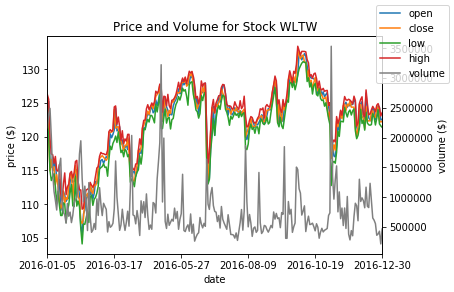

In [23]:
# If you are interested in the historical market data of any single stock, we can plot it with python. 
import matplotlib.pyplot as plt

# declare a function for plotting
def plot_market_data(symbol):
    title = "Price and Volume for Stock {}".format(symbol)
    price_adj_single_stock = price_adj.loc[price_adj['symbol'] == symbol]
    ax = price_adj_single_stock.plot(x='date', y=['open', 'close', 'low', 'high'], title=title, legend=False)
    ax.set_ylabel("price ($)")
    ax2 = ax.twinx()
    ax2.set_ylabel("volume ($)")
    price_adj_single_stock.plot(x='date', y='volume', ax=ax2, legend=False, color='grey')
    ax.figure.legend()
    plt.show()

# for example, let's plot the data of WLTW
plot_market_data(symbol='WLTW')

In [8]:
# Check if any outliers exist. 
# Studying the outliers/anomaly of the trading market helps looking for trade opportunities and detecting market manipulation.
# In this case, for every stock, if any data point is lying beyond the mean +/- 3*standard deviation, it's regarded as an outlier.

avg_price_adj = price_adj.groupby("symbol").mean()
std_price_adj = price_adj.groupby("symbol").std()

# a preview of averages and standard deviation
print("Mean group by symbol: ")
print(avg_price_adj.head(5))
print("\n")
print("Standard deviation group by symbol: ")
print(std_price_adj.head(5))
print("\n")

Mean group by symbol: 
              open       close         low        high        volume
symbol                                                              
A        34.065290   34.080221   33.714101   34.414842  3.927589e+06
AAL      23.875108   23.873768   23.466453   24.283933  9.354038e+06
AAP     103.724540  103.769597  102.685749  104.800505  1.022026e+06
AAPL     79.427744   79.402683   78.640034   80.140447  9.422578e+07
ABBV     55.441081   55.473641   54.829325   56.068165  8.470789e+06


Standard deviation group by symbol: 
             open      close        low       high        volume
symbol                                                          
A        7.438918   7.439467   7.436754   7.446296  2.384677e+06
AAL     15.555224  15.557106  15.346569  15.752355  6.361233e+06
AAP     43.422217  43.410717  42.966318  43.853331  7.632007e+05
AAPL    28.339001  28.330794  28.108525  28.561027  6.020519e+07
ABBV     8.708348   8.690668   8.658494   8.753659  6.233977e+06


In [9]:
# Apply z-score to standardize the price_adj
# z-score = (value - mean)/standard deviation
standard_price_adj = (price_adj.loc[:, ['open', 'close', 'low', 'high', 'volume']] - avg_price_adj.loc[price_adj['symbol']].reset_index().drop('symbol', axis=1))/std_price_adj.loc[price_adj['symbol']].reset_index().drop('symbol', axis=1)

In [10]:
standard_price_adj.describe()

,open,close,low,high,volume
count,8.512640e+05,8.512640e+05,8.512640e+05,8.512640e+05,8.512640e+05
mean,2.615874e-14,4.248523e-16,8.616209e-15,-1.142360e-14,2.273258e-15
std,9.997063e-01,9.997063e-01,9.997063e-01,9.997063e-01,9.997063e-01
min,-3.265804e+00,-3.346848e+00,-4.444284e+00,-3.326373e+00,-2.054887e+00
25%,-8.518393e-01,-8.523393e-01,-8.516351e-01,-8.531022e-01,-5.608011e-01
50%,-6.885842e-02,-6.835859e-02,-6.777925e-02,-6.913042e-02,-2.214952e-01
75%,8.132566e-01,8.132851e-01,8.124097e-01,8.144250e-01,2.797879e-01
max,6.156830e+00,5.989790e+00,5.733957e+00,6.058574e+00,3.904605e+01


In [11]:
# rows that contain outliers
outlier_rows = ((standard_price_adj>3)|(standard_price_adj<-3)).any(axis=1)

In [12]:
standard_price_adj['date'] = price_adj['date']
standard_price_adj['symbol'] = price_adj['symbol']
standard_price_adj = standard_price_adj.loc[:, ['date', 'symbol', 'open', 'close', 'low', 'high', 'volume']]

anomaly_standard_price_adj = standard_price_adj.loc[outlier_rows]
# save the standardized ajusted price dataframe and possible anomaly data into csv files for further research
standard_price_adj.to_csv('./nyse_processed/standardized-prices-split-adjusted.csv', index=False)
anomaly_standard_price_adj.to_csv('./nyse_processed/anomaly-standardized-prices-split-adjusted.csv', index=False)

In [13]:
# data exploration on the dataframe sec
# a preview of sec

sec.head(5)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


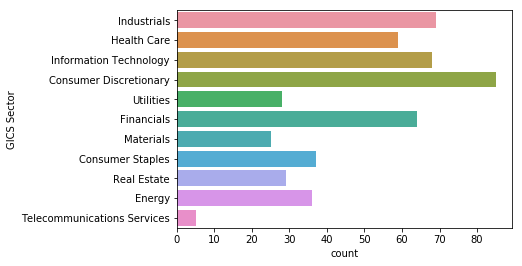

In [14]:

import seaborn as sns

# plot the distribution of sectors
sns.countplot(y = 'GICS Sector', data=sec)


In [15]:

#Caculate the return for stocks
return_adj = price_adj.sort_values(['symbol', 'date']).reset_index(drop=True)
return_adj['return'] = return_adj.groupby('symbol')['close'].pct_change()
return_adj.head(5)

,date,symbol,open,close,low,high,volume,return
0,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,NaN
1,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,-0.010863
2,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,-0.003553
3,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,-0.001297
4,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,-0.000325


In [16]:
#Use the average return of stocks belonging to the same sector to roughly repesent the return of the sector
return_adj_sector = pd.merge(return_adj, sec, left_on='symbol', right_on='Ticker symbol', how='left')
return_adj_sector.head(5)

,date,symbol,open,close,low,high,volume,return,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,NaN,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",NaN,1090872
1,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,-0.010863,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",NaN,1090872
2,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,-0.003553,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",NaN,1090872
3,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,-0.001297,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",NaN,1090872
4,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,-0.000325,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",NaN,1090872


In [17]:
sector_return = pd.pivot_table(return_adj_sector, values='return', index='date', columns='GICS Sector').reset_index()
sector_return.head(5)

GICS Sector,date,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
0,2010-01-05,0.009934,0.000052,0.010207,0.010815,-0.003738,0.006213,-0.000326,0.001390,0.006273,0.003421,-0.008217
1,2010-01-06,0.003748,0.003591,0.011475,0.003268,0.002517,0.003230,-0.003750,0.009759,-0.002350,-0.031040,0.003867
2,2010-01-07,0.010848,-0.000378,-0.003043,0.019033,0.006222,0.010519,-0.005109,-0.003395,0.008754,-0.005139,-0.003571
3,2010-01-08,0.002619,-0.004157,0.009318,-0.000442,0.000620,0.010383,0.006629,0.005391,-0.007052,-0.010185,0.000097
4,2010-01-11,0.002359,0.003943,-0.008534,0.001959,0.007429,0.007313,-0.002119,-0.001831,0.003362,-0.001159,0.011245


In [18]:
# save the return of sectors to csv file for furthur research
sector_return.to_csv('./nyse_processed/sector-return.csv', index=False)

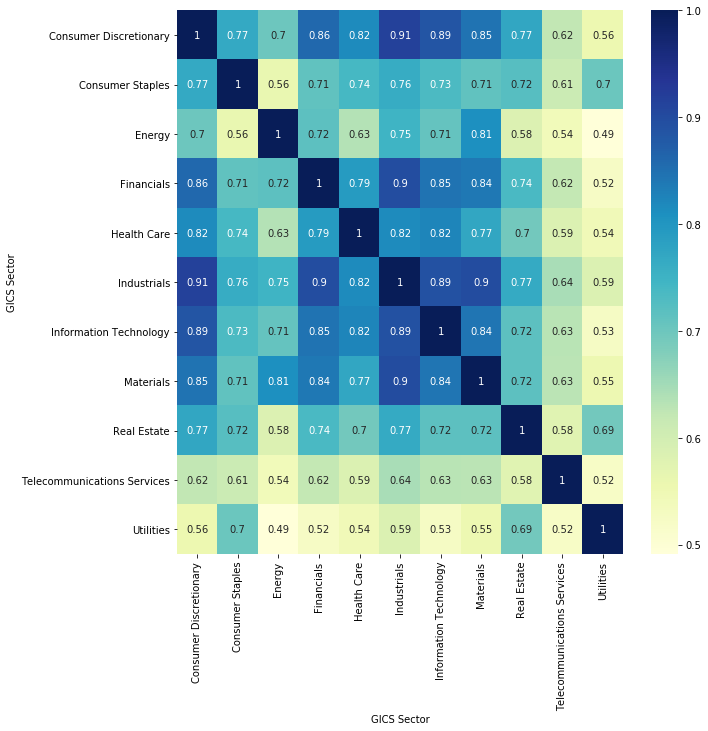

In [19]:
# based on the date range you select, 
# you can calculate long-term, middle-term and short-term covariance matrix of sectors 
# and their correlaions

# For example, my date range is the same with the whole data set
# Calculate the correlations of the sectors and plot heatmap to show the correlations

plt.figure(figsize = (10,10))
sns.heatmap(sector_return.corr(), annot=True, cmap="YlGnBu")

In [20]:
# Calculate the covariance matrix of the sectors 
cov_matrix = sector_return.cov()

In [21]:
# Based on the multi-factor model, we can calculate the risk of a portfolio by using the equation
# Risk = BVB^T + Sigma, 
# where B is the exposures of the portfolio to factors and V is the covariance matrix of the factors 
# and Sigma is the diagonal matrix of specific return

# For example, if we create a porfolio evenly exposed to the 11 sectors and Sigma is unkown but we know it is small
# The vector Risk can by calculated by 

import numpy as np
B = np.eye(11)/11
R = np.dot(np.dot(B, cov_matrix), B.T)
print(R)

[[1.12713578e-06 5.76616858e-07 1.15326291e-06 1.13111445e-06
  8.22694605e-07 1.05692414e-06 1.03188794e-06 1.03152682e-06
  9.09146620e-07 6.96868547e-07 5.06943257e-07]
 [5.76616858e-07 5.00631187e-07 6.16793087e-07 6.24583631e-07
  4.97106166e-07 5.87388059e-07 5.69640949e-07 5.78356877e-07
  5.67178583e-07 4.55073609e-07 4.28180376e-07]
 [1.15326291e-06 6.16793087e-07 2.40291419e-06 1.37760578e-06
  9.33927167e-07 1.26403080e-06 1.20416284e-06 1.44082942e-06
  1.00347153e-06 8.83088839e-07 6.55054603e-07]
 [1.13111445e-06 6.24583631e-07 1.37760578e-06 1.53435542e-06
  9.30829263e-07 1.20888913e-06 1.14917620e-06 1.19446920e-06
  1.01253494e-06 8.09956522e-07 5.58935958e-07]
 [8.22694605e-07 4.97106166e-07 9.33927167e-07 9.30829263e-07
  9.00793434e-07 8.43371058e-07 8.57378130e-07 8.41051949e-07
  7.32908216e-07 5.85307332e-07 4.44221059e-07]
 [1.05692414e-06 5.87388059e-07 1.26403080e-06 1.20888913e-06
  8.43371058e-07 1.18427017e-06 1.06533215e-06 1.12395931e-06
  9.24815734e-07

In [22]:
risk = R.sum()
print("Risk of the portfolio is ", risk)

Risk of the portfolio is  0.00010397644813950918
